# XGBoost
* 트리 기반의 앙상블 기법
* GBM기반이지만, GBM의 느린 수행시간과 과적합 규제 부재등의 문제 보완
* 병렬 CPU환경에서 빠르게 학습

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
cancer  = load_breast_cancer()
X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target, random_state = 42, test_size= 0.2)
dtrain = xgb.DMatrix(data =X_train, label = y_train)
dtest = xgb.DMatrix(data =X_val, label = y_val)

## 파라미터 지정

In [4]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective':'binary:logistic',
    'eval_metric' : 'logloss',
    'early_stopping' : 100
}
num_rounds = 400

In [5]:
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds = 100, evals = evals)


[0]	train-logloss:0.609607	eval-logloss:0.614431
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540756	eval-logloss:0.547208
[2]	train-logloss:0.484074	eval-logloss:0.495586
[3]	train-logloss:0.433242	eval-logloss:0.446594
[4]	train-logloss:0.389846	eval-logloss:0.406819
[5]	train-logloss:0.352125	eval-logloss:0.370823
[6]	train-logloss:0.319491	eval-logloss:0.340322
[7]	train-logloss:0.291385	eval-logloss:0.315586
[8]	train-logloss:0.266061	eval-logloss:0.291813
[9]	train-logloss:0.243922	eval-logloss:0.27323
[10]	train-logloss:0.224081	eval-logloss:0.254899
[11]	train-logloss:0.206975	eval-logloss:0.242168
[12]	train-logloss:0.191283	eval-logloss:0.225769
[13]	train-logloss:0.177047	eval-logloss:0.212827
[14]	train-logloss:0.16451	eval-logloss:0.199469
[15]	train-logloss:0.153192	eval-logloss:0.191687
[16]	train-logloss:0.14312	eval-logloss:0.180686
[17]	train-lo

In [6]:
import numpy as np
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10], 3))

[0.995 0.    0.    1.    1.    0.    0.001 0.065 0.346 1.   ]


In [7]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds)

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [8]:
print('정확도 : {}'.format(accuracy_score(y_val, preds)))
print('정확도 : {}'.format(precision_score(y_val, preds)))
print('정확도 : {}'.format(recall_score(y_val, preds)))

정확도 : 0.9736842105263158
정확도 : 0.9722222222222222
정확도 : 0.9859154929577465


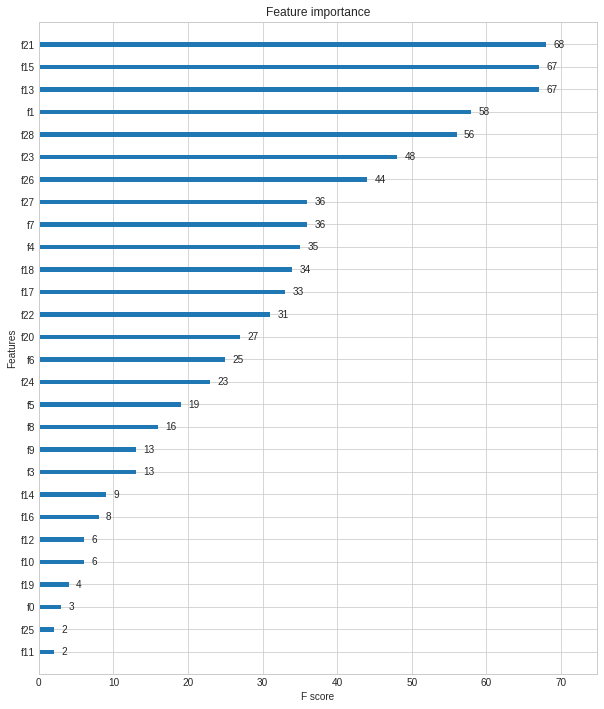

In [9]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax =ax)

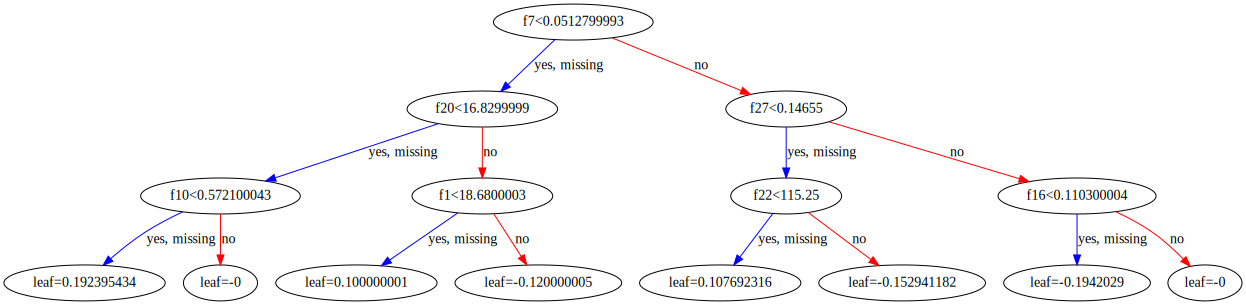

In [11]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

## XGBClassifier

### 붓꽃 데이터

In [13]:
iris = load_iris()
X_train, X_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size = 0.2, random_state= 42)

In [14]:
xgbc = XGBClassifier(n_estimators= 400, learning_rate= 0.1, max_depth =3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_val)
preds_pro = xgbc.predict_proba(X_val)[:, 1]

In [22]:
cross_val = cross_validate(
    estimator = xgbc,
    X =iris.data, y = iris.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.07534856796264648 (+/- 0.005803577254859526)
avg_score_time = 0.0009868144989013672 (+/- 5.404734112936816e-05)
avg_test_time = 0.96 (+/- 0.024944382578492935)


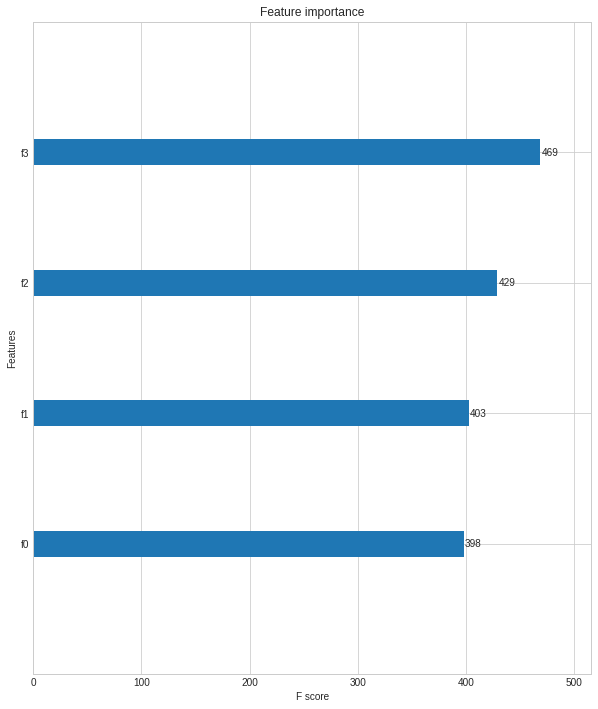

In [23]:
fig,ax = plt.subplots(figsize = (10, 12))
plot_importance(xgbc, ax = ax)

####트리 그래프 출력

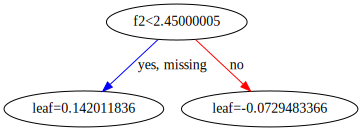

In [26]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 와인 데이터

In [34]:
wine = load_wine()
X_train, X_val, y_train, y_val = train_test_split(wine.data, wine.target, test_size = 0.2, random_state= 42)

In [35]:
xgbc = XGBClassifier(n_estimators= 400, learning_rate= 0.1, max_depth =3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_val)


In [36]:
cross_val = cross_validate(
    estimator = xgbc,
    X =wine.data, y = wine.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.10530657768249511 (+/- 0.003845229429712144)
avg_score_time = 0.0009713172912597656 (+/- 3.965725959147641e-05)
avg_test_time = 0.9609523809523809 (+/- 0.028267341226138717)


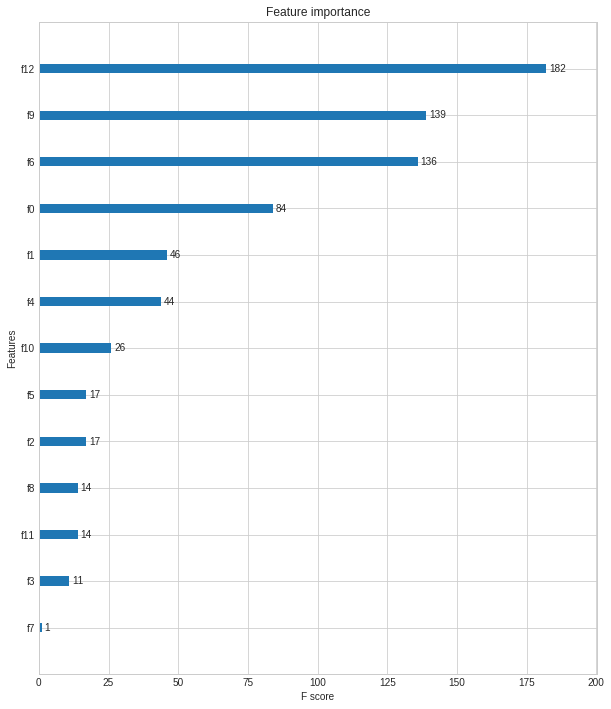

In [37]:
fig,ax = plt.subplots(figsize = (10, 12))
plot_importance(xgbc, ax = ax)

#### 트리 그래프 출력

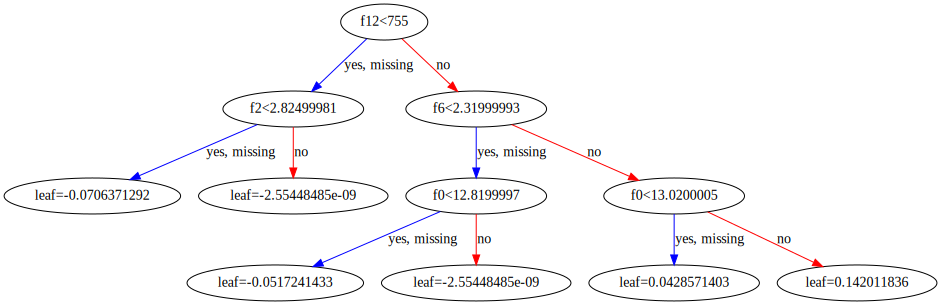

In [38]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 유방암 데이터

In [40]:
cancer = load_breast_cancer()
X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state= 42)

In [41]:
xgbc = XGBClassifier(n_estimators= 400, learning_rate= 0.1, max_depth =3)
xgbc.fit(X_train, y_train)
preds = xgbc.predict(X_val)

In [42]:
cross_val = cross_validate(
    estimator = xgbc,
    X =cancer.data, y = cancer.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.19683389663696288 (+/- 0.008063472599374412)
avg_score_time = 0.001402568817138672 (+/- 5.271680098113292e-05)
avg_test_time = 0.9736376339077782 (+/- 0.009609619188189153)


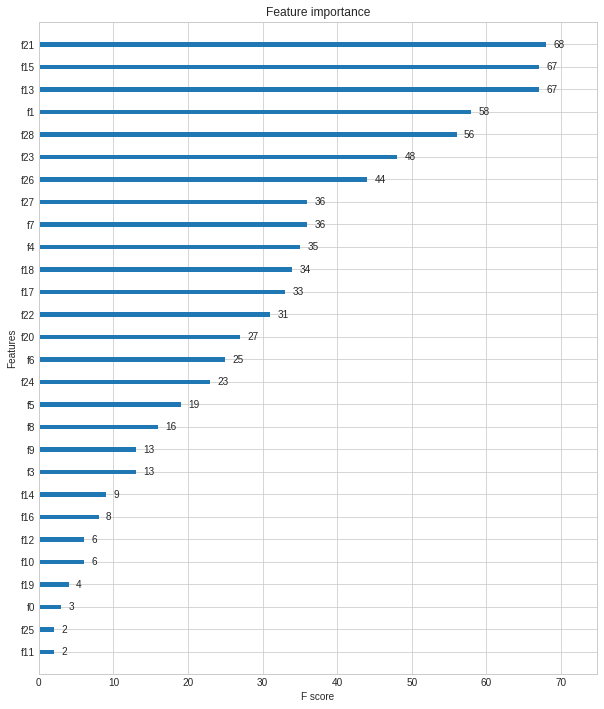

In [43]:
fig,ax = plt.subplots(figsize = (10, 12))
plot_importance(xgbc, ax = ax)

#### 트리 그래프 출력

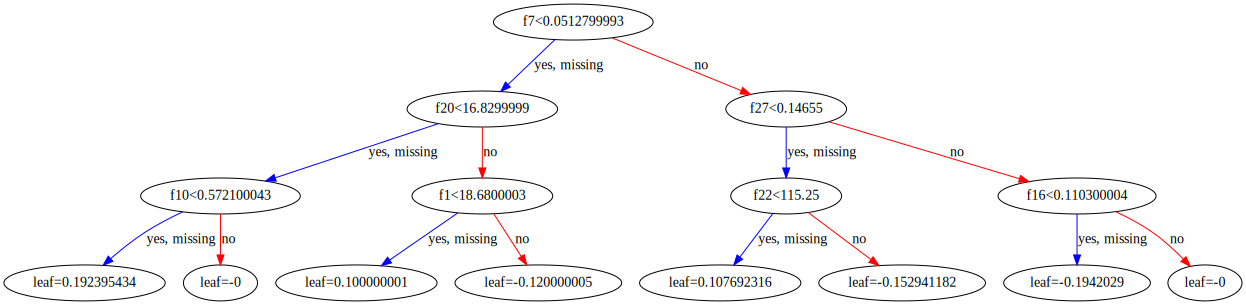

In [44]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

## XGBRegressor

### 보스턴 데이터

In [68]:
boston = load_boston()
X_train, X_val, y_train, y_val = train_test_split(boston.data, boston.target, test_size = 0.2, random_state= 42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [69]:
xgbr = XGBRegressor(n_estimators= 400, learning_rate= 0.1, max_depth =3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_val)

In [70]:
cross_val = cross_validate(
    estimator = xgbr,
    X =boston.data, y = boston.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.14051012992858886 (+/- 0.0021499071313104226)
avg_score_time = 0.002002906799316406 (+/- 4.8034900630789776e-05)
avg_test_time = 0.6884390572208088 (+/- 0.16499747484510102)


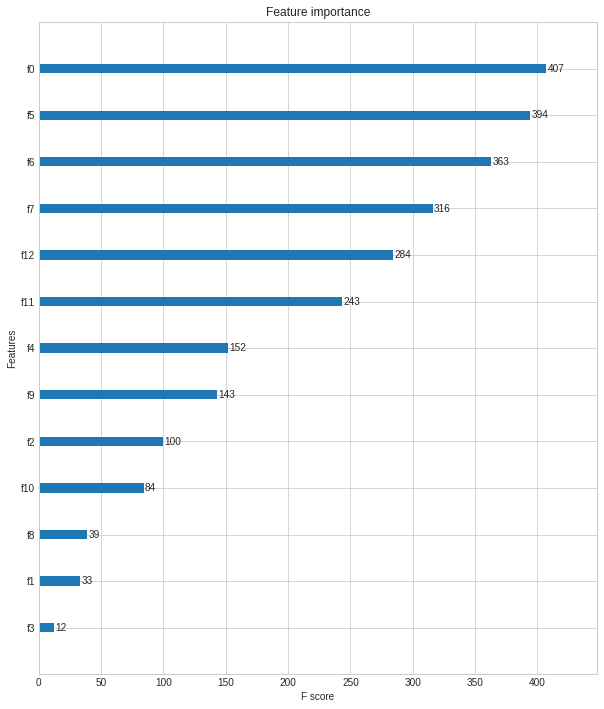

In [71]:
fig,ax = plt.subplots(figsize = (10, 12))
plot_importance(xgbr, ax = ax)

#### 트리 그래프 출력

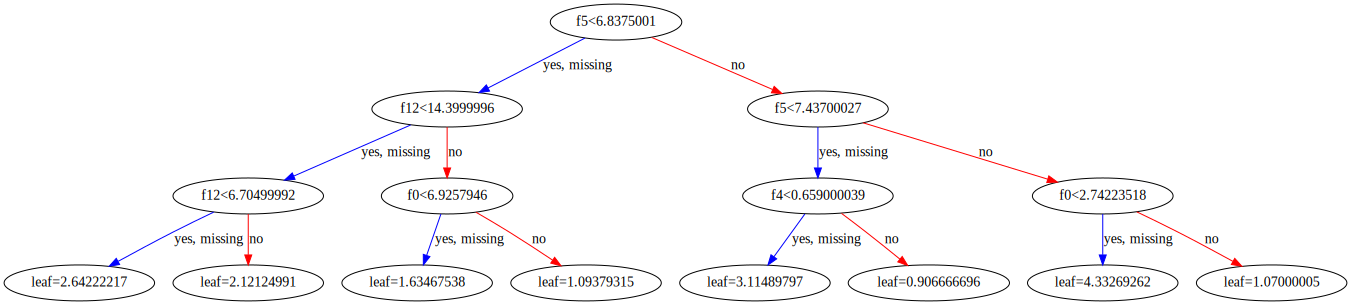

In [72]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

### 당뇨병 데이터

In [74]:
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state= 42)

In [75]:
xgbr = XGBRegressor(n_estimators= 400, learning_rate= 0.1, max_depth =3, objective='reg:squarederror')
xgbr.fit(X_train, y_train)
preds = xgbr.predict(X_val)

In [76]:
cross_val = cross_validate(
    estimator = xgbr,
    X =diabetes.data, y = diabetes.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.11503829956054687 (+/- 0.0026013577678929032)
avg_score_time = 0.0017165184020996095 (+/- 6.914888538620109e-05)
avg_test_time = 0.3000529025802777 (+/- 0.07589311710543882)


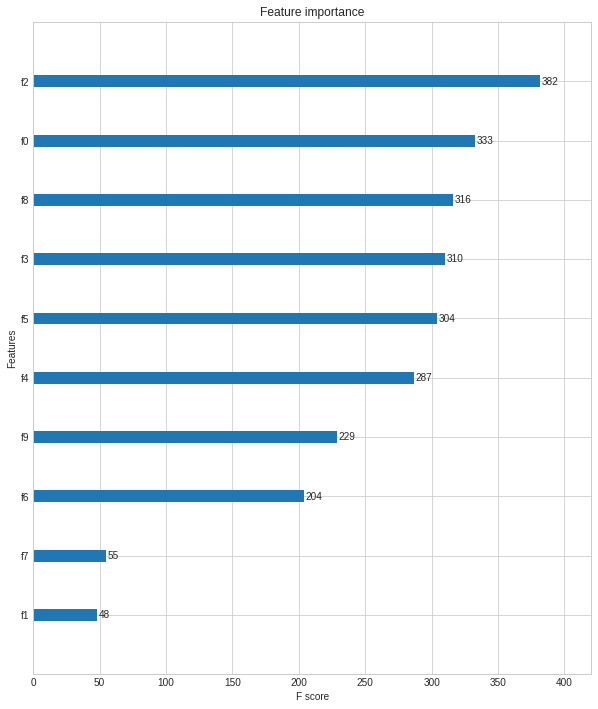

In [77]:
fig,ax = plt.subplots(figsize = (10, 12))
plot_importance(xgbr, ax = ax)

#### 트리 그래프 출력

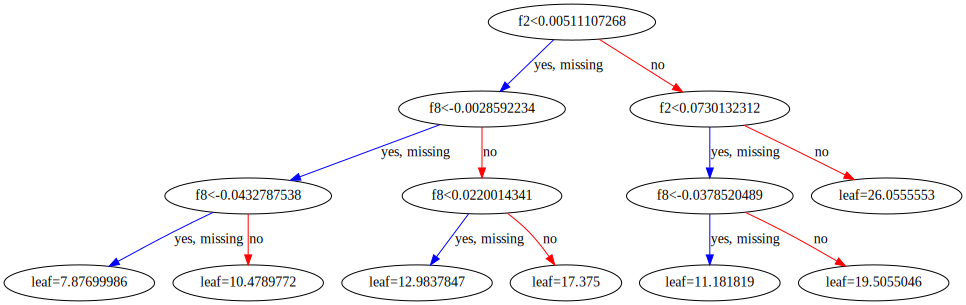

In [78]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# LightGBM
* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적분할

## 라이브러리 설치

In [79]:
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [80]:
iris = load_iris()
X_train, X_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 42)

In [84]:
lgbmc = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals,verbose=True)
preds = lgbmc.predict(X_val)

[1]	valid_0's multi_logloss: 0.971501	valid_0's multi_logloss: 0.971501
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.862864	valid_0's multi_logloss: 0.862864
[3]	valid_0's multi_logloss: 0.770245	valid_0's multi_logloss: 0.770245
[4]	valid_0's multi_logloss: 0.691499	valid_0's multi_logloss: 0.691499
[5]	valid_0's multi_logloss: 0.621931	valid_0's multi_logloss: 0.621931
[6]	valid_0's multi_logloss: 0.562157	valid_0's multi_logloss: 0.562157
[7]	valid_0's multi_logloss: 0.506628	valid_0's multi_logloss: 0.506628
[8]	valid_0's multi_logloss: 0.459975	valid_0's multi_logloss: 0.459975
[9]	valid_0's multi_logloss: 0.416406	valid_0's multi_logloss: 0.416406
[10]	valid_0's multi_logloss: 0.379677	valid_0's multi_logloss: 0.379677
[11]	valid_0's multi_logloss: 0.345065	valid_0's multi_logloss: 0.345065
[12]	valid_0's multi_logloss: 0.316382	valid_0's multi_logloss: 0.316382
[13]	valid_0's multi_logloss: 0.289769	valid_0's multi_logloss: 0.2897

In [85]:
cross_val = cross_validate(
    estimator = lgbmc,
    X =iris.data, y = iris.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.0495661735534668 (+/- 0.0031778821677596464)
avg_score_time = 0.0012052536010742187 (+/- 7.166775241607559e-05)
avg_test_time = 0.9533333333333335 (+/- 0.06182412330330468)


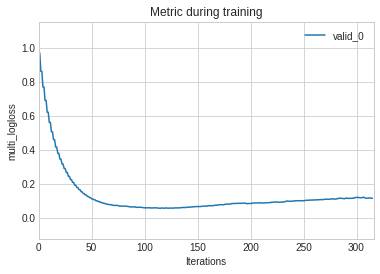

In [86]:
plot_metric(lgbmc)

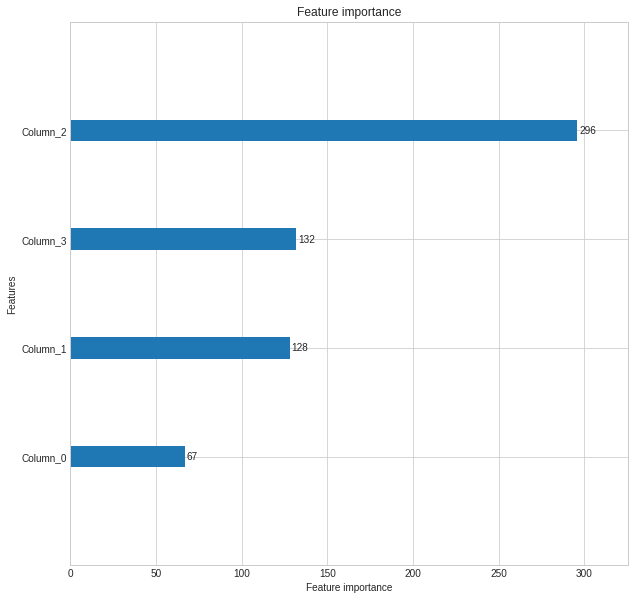

In [90]:
plot_importance(lgbmc, figsize = (10,10))

#### 트리 그래프 출력

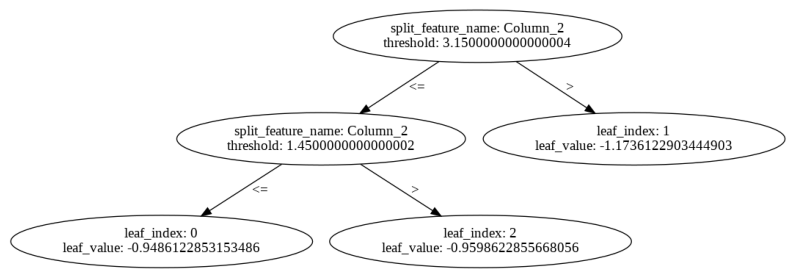

In [93]:
plot_tree(lgbmc, figsize = (14,14))

### 와인 데이터

In [112]:
wine = load_wine()
X_train, X_val, y_train, y_val = train_test_split(wine.data, wine.target, test_size = 0.2, random_state = 42)

In [113]:
lgbmc = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals,verbose=True)
preds = lgbmc.predict(X_val)

[1]	valid_0's multi_logloss: 0.968557	valid_0's multi_logloss: 0.968557
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.883142	valid_0's multi_logloss: 0.883142
[3]	valid_0's multi_logloss: 0.801303	valid_0's multi_logloss: 0.801303
[4]	valid_0's multi_logloss: 0.738433	valid_0's multi_logloss: 0.738433
[5]	valid_0's multi_logloss: 0.678524	valid_0's multi_logloss: 0.678524
[6]	valid_0's multi_logloss: 0.62947	valid_0's multi_logloss: 0.62947
[7]	valid_0's multi_logloss: 0.582938	valid_0's multi_logloss: 0.582938
[8]	valid_0's multi_logloss: 0.538492	valid_0's multi_logloss: 0.538492
[9]	valid_0's multi_logloss: 0.50399	valid_0's multi_logloss: 0.50399
[10]	valid_0's multi_logloss: 0.468616	valid_0's multi_logloss: 0.468616
[11]	valid_0's multi_logloss: 0.438007	valid_0's multi_logloss: 0.438007
[12]	valid_0's multi_logloss: 0.411015	valid_0's multi_logloss: 0.411015
[13]	valid_0's multi_logloss: 0.383457	valid_0's multi_logloss: 0.383457
[

In [114]:
cross_val = cross_validate(
    estimator = lgbmc,
    X =wine.data, y = wine.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.06170392036437988 (+/- 0.006289539069379876)
avg_score_time = 0.0012660503387451171 (+/- 0.00018344808601359553)
avg_test_time = 0.9720634920634922 (+/- 0.030430686929136006)


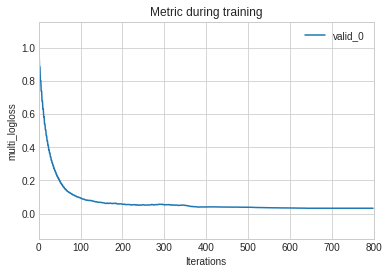

In [115]:
plot_metric(lgbmc)

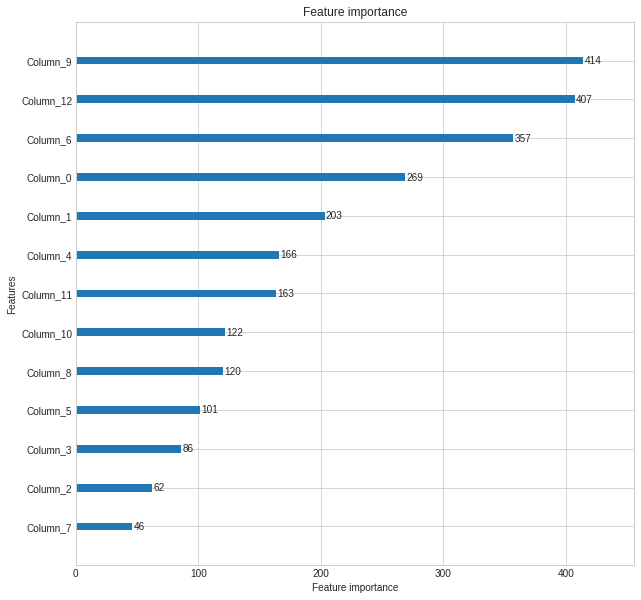

In [116]:
plot_importance(lgbmc, figsize = (10,10))

#### 트리 그래프 출력

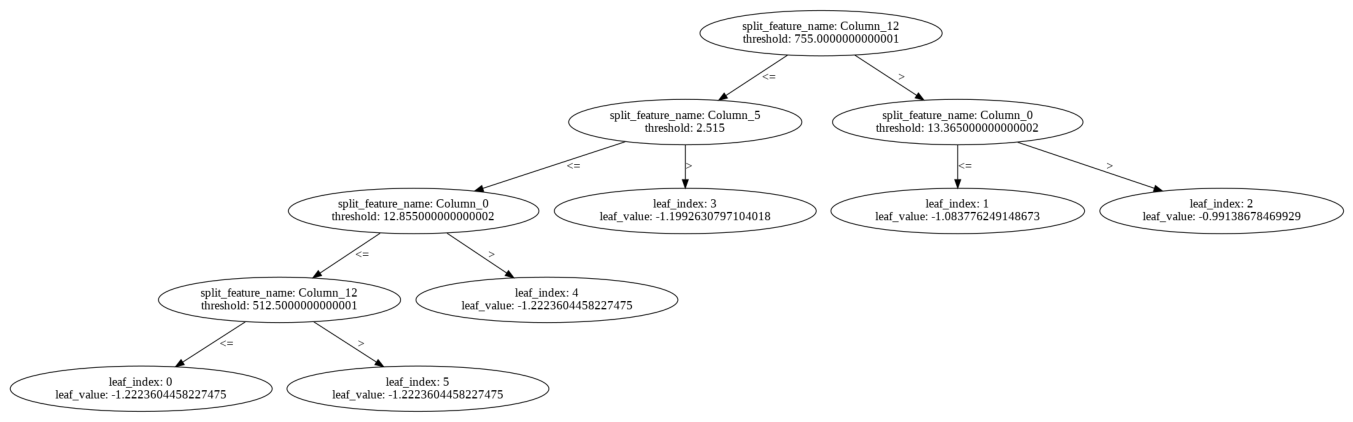

In [105]:
plot_tree(lgbmc, figsize = (24,30))

### 유방암 데이터

In [106]:
cancer = load_breast_cancer()
X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 42)

In [107]:
lgbmc = LGBMClassifier(n_estimators= 400)
evals = [(X_val, y_val)]
lgbmc.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals,verbose=True)
preds = lgbmc.predict(X_val)

[1]	valid_0's binary_logloss: 0.587533	valid_0's binary_logloss: 0.587533
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.52449	valid_0's binary_logloss: 0.52449
[3]	valid_0's binary_logloss: 0.472657	valid_0's binary_logloss: 0.472657
[4]	valid_0's binary_logloss: 0.432004	valid_0's binary_logloss: 0.432004
[5]	valid_0's binary_logloss: 0.391511	valid_0's binary_logloss: 0.391511
[6]	valid_0's binary_logloss: 0.357212	valid_0's binary_logloss: 0.357212
[7]	valid_0's binary_logloss: 0.329036	valid_0's binary_logloss: 0.329036
[8]	valid_0's binary_logloss: 0.302392	valid_0's binary_logloss: 0.302392
[9]	valid_0's binary_logloss: 0.281315	valid_0's binary_logloss: 0.281315
[10]	valid_0's binary_logloss: 0.26363	valid_0's binary_logloss: 0.26363
[11]	valid_0's binary_logloss: 0.247288	valid_0's binary_logloss: 0.247288
[12]	valid_0's binary_logloss: 0.228944	valid_0's binary_logloss: 0.228944
[13]	valid_0's binary_logloss: 0.216059	valid_0's 

In [108]:
cross_val = cross_validate(
    estimator = lgbmc,
    X =cancer.data, y = cancer.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.19743938446044923 (+/- 0.002893173526011108)
avg_score_time = 0.0021354198455810548 (+/- 2.4125132941655836e-05)
avg_test_time = 0.9701288619779536 (+/- 0.0180536992368202)


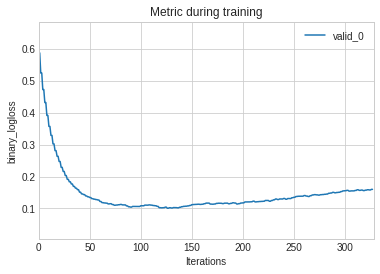

In [109]:
plot_metric(lgbmc)

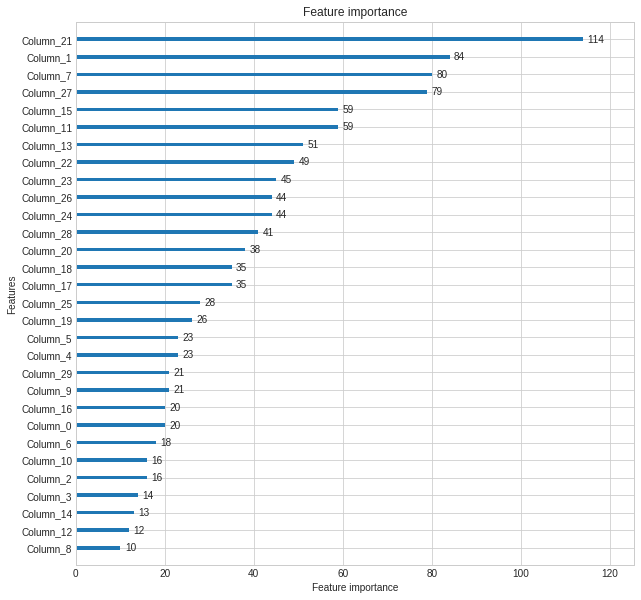

In [110]:
plot_importance(lgbmc, figsize = (10,10))

#### 트리 그래프 출력

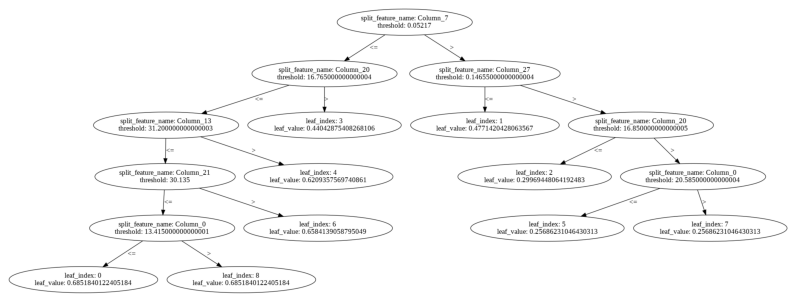

In [111]:
plot_tree(lgbmc, figsize = (14,14))

## LGBMRegressor

### 보스턴 데이터

In [117]:
boston = load_boston()
X_train, X_val, y_train, y_val = train_test_split(boston.data, boston.target, test_size = 0.2, random_state = 42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [118]:
lgbmr = LGBMRegressor(n_estimators= 400)
evals = [(X_val, y_val)]
lgbmr.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals,verbose=True)
preds = lgbmr.predict(X_val)

[1]	valid_0's l2: 64.4937
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 55.7111
[3]	valid_0's l2: 48.119
[4]	valid_0's l2: 42.2591
[5]	valid_0's l2: 37.0764
[6]	valid_0's l2: 32.882
[7]	valid_0's l2: 29.7398
[8]	valid_0's l2: 26.9836
[9]	valid_0's l2: 24.9355
[10]	valid_0's l2: 22.8902
[11]	valid_0's l2: 21.3226
[12]	valid_0's l2: 19.9277
[13]	valid_0's l2: 18.4472
[14]	valid_0's l2: 17.4522
[15]	valid_0's l2: 16.487
[16]	valid_0's l2: 15.5851
[17]	valid_0's l2: 15.1318
[18]	valid_0's l2: 14.4821
[19]	valid_0's l2: 13.9643
[20]	valid_0's l2: 13.646
[21]	valid_0's l2: 13.1238
[22]	valid_0's l2: 12.8844
[23]	valid_0's l2: 12.6853
[24]	valid_0's l2: 12.3155
[25]	valid_0's l2: 12.2249
[26]	valid_0's l2: 11.9929
[27]	valid_0's l2: 11.7125
[28]	valid_0's l2: 11.5159
[29]	valid_0's l2: 11.4367
[30]	valid_0's l2: 11.242
[31]	valid_0's l2: 11.0335
[32]	valid_0's l2: 10.8941
[33]	valid_0's l2: 10.728
[34]	valid_0's l2: 10.6228
[35]	valid_0's l2: 10.4807
[36]	va

In [119]:
cross_val = cross_validate(
    estimator = lgbmr,
    X =boston.data, y = boston.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.1399071216583252 (+/- 0.00545261224176506)
avg_score_time = 0.0032217979431152345 (+/- 0.0004021981485054397)
avg_test_time = 0.5692468252571979 (+/- 0.2956636613238221)


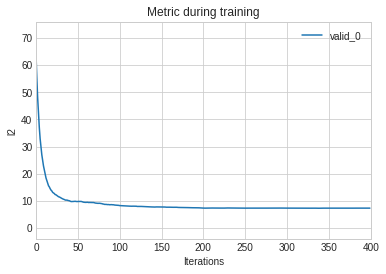

In [120]:
plot_metric(lgbmr)

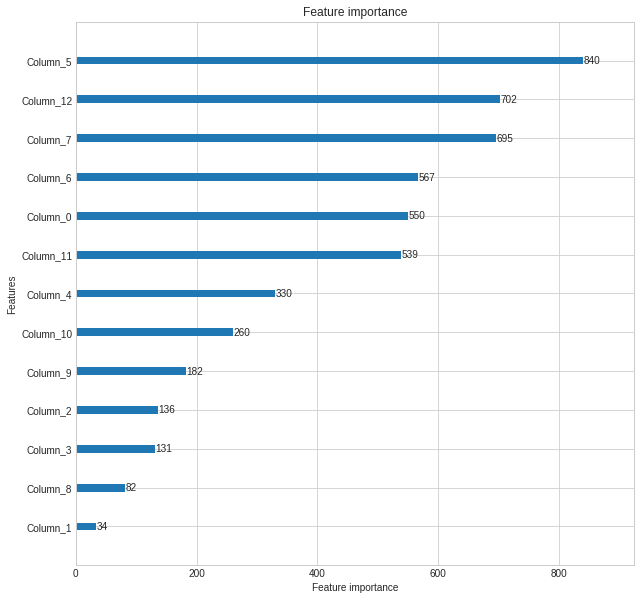

In [121]:
plot_importance(lgbmr, figsize = (10,10))

#### 트리 그래프 출력

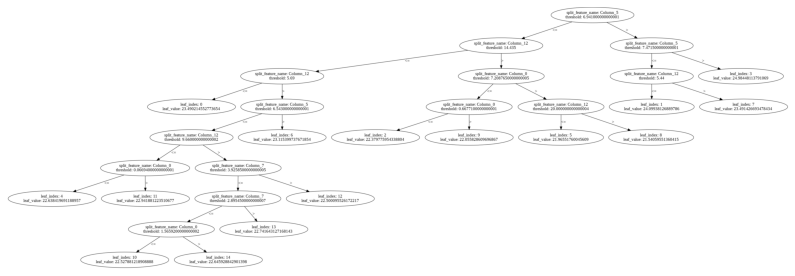

In [122]:
plot_tree(lgbmr, figsize = (14,14))

### 당뇨병 데이터

In [123]:
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state = 42)

In [124]:
lgbmr = LGBMRegressor(n_estimators= 400)
evals = [(X_val, y_val)]
lgbmr.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals,verbose=True)
preds = lgbmr.predict(X_val)

[1]	valid_0's l2: 4852.3
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 4494.34
[3]	valid_0's l2: 4158.41
[4]	valid_0's l2: 3911.95
[5]	valid_0's l2: 3677.33
[6]	valid_0's l2: 3555.45
[7]	valid_0's l2: 3420.01
[8]	valid_0's l2: 3262.75
[9]	valid_0's l2: 3171.44
[10]	valid_0's l2: 3086.98
[11]	valid_0's l2: 3067.47
[12]	valid_0's l2: 2992.62
[13]	valid_0's l2: 2938.12
[14]	valid_0's l2: 2887.83
[15]	valid_0's l2: 2912.85
[16]	valid_0's l2: 2944.28
[17]	valid_0's l2: 2871.61
[18]	valid_0's l2: 2886.37
[19]	valid_0's l2: 2907.67
[20]	valid_0's l2: 2892.37
[21]	valid_0's l2: 2889.83
[22]	valid_0's l2: 2892.36
[23]	valid_0's l2: 2902.61
[24]	valid_0's l2: 2878.99
[25]	valid_0's l2: 2881.27
[26]	valid_0's l2: 2892.43
[27]	valid_0's l2: 2900.83
[28]	valid_0's l2: 2898.12
[29]	valid_0's l2: 2880.18
[30]	valid_0's l2: 2937.25
[31]	valid_0's l2: 2926.48
[32]	valid_0's l2: 2942.44
[33]	valid_0's l2: 2937.12
[34]	valid_0's l2: 2912.19
[35]	valid_0's l2: 2927.63
[3

In [125]:
cross_val = cross_validate(
    estimator = lgbmr,
    X =diabetes.data, y = diabetes.target,
    cv= 5
)
print('avg_fit_time = {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg_score_time = {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg_test_time = {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg_fit_time = 0.09947624206542968 (+/- 0.0025180745325173856)
avg_score_time = 0.0027959346771240234 (+/- 0.0001109831699346492)
avg_test_time = 0.30867643947179507 (+/- 0.07010708786960605)


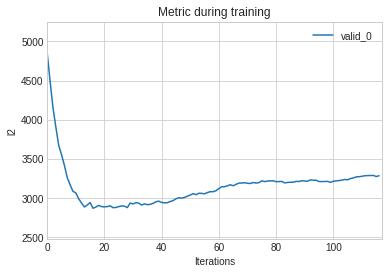

In [126]:
plot_metric(lgbmr)

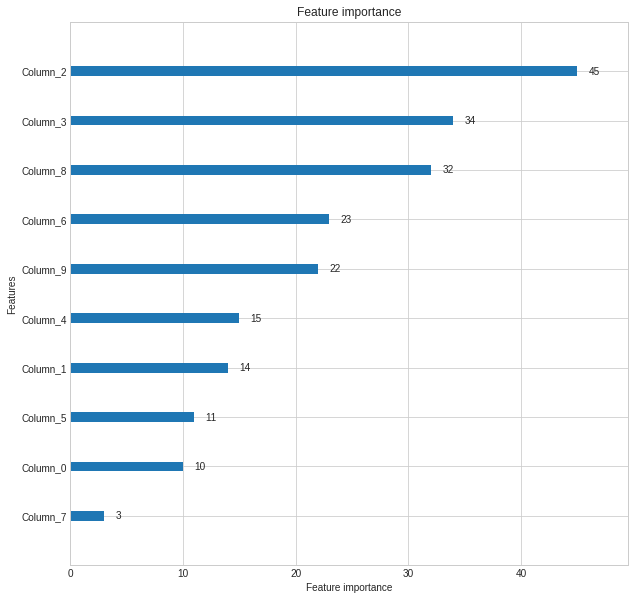

In [127]:
plot_importance(lgbmr, figsize = (10,10))

#### 트리 그래프 출력

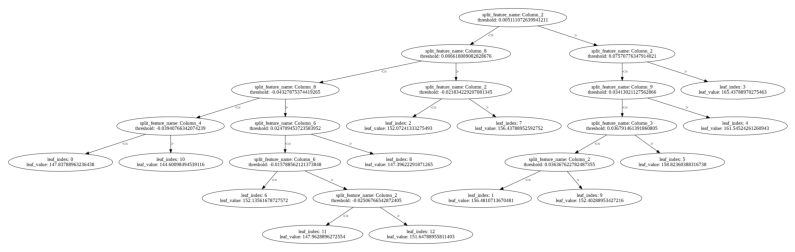

In [128]:
plot_tree(lgbmr, figsize = (14,14))